# Simple algorithms for solving cart pole

Implementing random search and hill-climb method on cart pole. Code is adapted from http://kvfrans.com/simple-algoritms-for-solving-cartpole/.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Utility function for running an epidose

In [2]:
def run_episode(env, parameters, submit=False):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        if submit:
            env.render()
        totalreward += reward
        if done:
            break
    return totalreward

# Random search

Trying to find optimal parameters randomly

In [20]:
def train(submit):
    env = gym.make('CartPole-v0')

    counter = 0
    bestparams = None
    bestreward = 0
    for _ in range(10000):
        counter += 1
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            if reward == 200:
                break

    if submit:
        run_episode(env,bestparams, submit=True)
        env.close()

    return counter

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


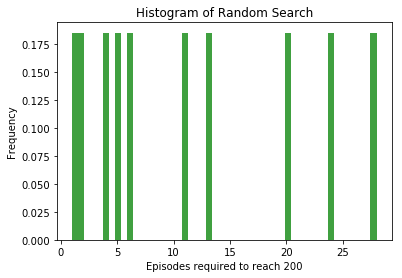

11.4


In [21]:
# train an agent to submit to openai gym
# train(submit=True)

# create graphs
results = []
nr_runs=10
for _ in range(nr_runs):
    results.append(train(submit=True))

plt.hist(results,50,normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print(np.sum(results) / nr_runs)

# Hill-climbing

Gradualy improving best parameters so far

In [22]:
def train(submit):
    env = gym.make('CartPole-v0')
    if submit:
        env.render()
        
    episodes_per_update = 5
    noise_scaling = 0.1
    parameters = np.random.rand(4) * 2 - 1
    bestreward = 0
    counter = 0

    for _ in range(10000):
        counter += 1
        newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
        # print newparams
        # reward = 0
        # for _ in xrange(episodes_per_update):
        #     run = run_episode(env,newparams)
        #     reward += run
        reward = run_episode(env,newparams)
        # print "reward %d best %d" % (reward, bestreward)
        if reward > bestreward:
            # print "update"
            bestreward = reward
            parameters = newparams
            if reward == 200:
                break

    if submit:
        run_episode(env,parameters, submit=True)
        env.close()

    return counter

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


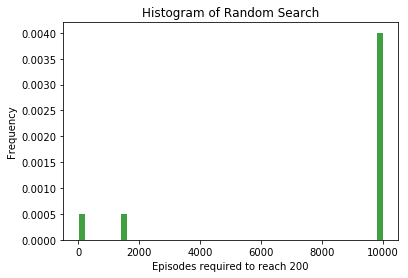

8146.4


In [23]:
results = []
nr_runs=10
for _ in range(nr_runs):
    results.append(train(submit=True))

plt.hist(results,50,normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print(np.sum(results) / nr_runs)